In [223]:
#Importing needed modules.
from random import sample , seed
from os import mkdir , listdir
from shutil import copyfile , rmtree
from matplotlib.pyplot import plot , xlabel , ylabel , show , title , legend 
from skimage.io import imread_collection , imshow_collection
from tensorflow.keras.preprocessing.image import load_img , ImageDataGenerator 
from tensorflow.keras import layers , Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import RMSprop
#Instancing from ImageDataGenerator object.
gen_tr = ImageDataGenerator(rescale=1/255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            horizontal_flip=True,
                            zoom_range=0.2)
gen = ImageDataGenerator(rescale=1/255)

In [241]:
#Choosing six imgage from each class randomly in order to display them.
pizza_photos = [f"D:\\datasets\\pizza_not_pizza\\pizza\\{i}" for i in sample(listdir("D:\\datasets\\pizza_not_pizza\\pizza"),6)]
not_pizza_photos = [f"D:\\datasets\\pizza_not_pizza\\not_pizza\\{i}" for i in sample(listdir("D:\\datasets\\pizza_not_pizza\\not_pizza"),6)]

In [242]:
read_pizzas = imread_collection(pizza_photos)
read_not_pizzas = imread_collection(not_pizza_photos)

Pizza photos


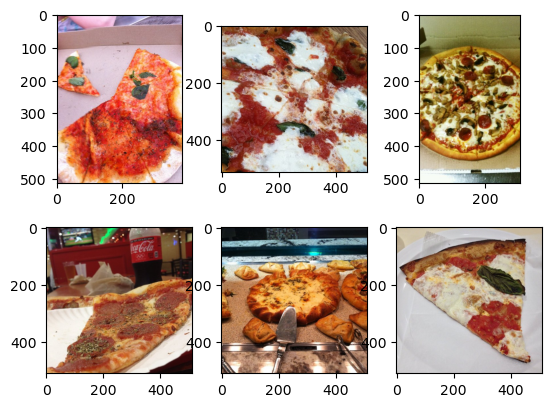

In [243]:
print('Pizza photos')
imshow_collection(read_pizzas)
show()

Not Pizza photos


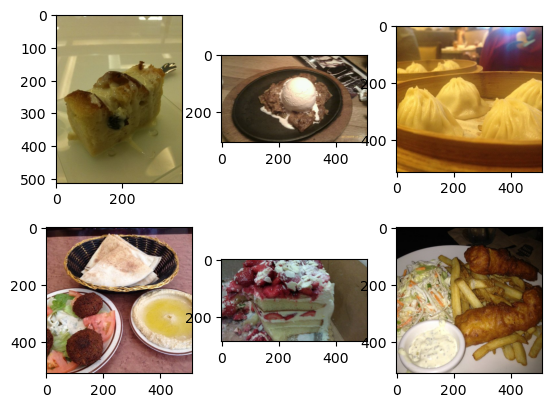

In [244]:
print('Not Pizza photos')
imshow_collection(read_not_pizzas)
show()

In [205]:
#Making basic directories.
def make_paths(base_path)->tuple:
    '''Function docstring'''
    if 'Ready_to_gen' in listdir(base_path):
        rmtree(f'{base_path}\\Ready_to_gen')
    mkdir(f'{base_path}\\Ready_to_gen')
    mkdir(f'{base_path}\\Ready_to_gen\\train')
    mkdir(f'{base_path}\\Ready_to_gen\\train\\Pizza')
    mkdir(f'{base_path}\\Ready_to_gen\\train\\Not_Pizza')
    mkdir(f'{base_path}\\Ready_to_gen\\valid')
    mkdir(f'{base_path}\\Ready_to_gen\\valid\\Pizza')
    mkdir(f'{base_path}\\Ready_to_gen\\valid\\Not_Pizza')
    return f'{base_path}\\Ready_to_gen\\train' , f'{base_path}\\Ready_to_gen\\valid'

In [206]:
train_path , valid_path = make_paths("D:\\datasets\\pizza_not_pizza")
def Split_images(base_path,tr_path,val_path,train_size=80)->None:
    '''Function docstring'''
    for folder in listdir(base_path) :
        if folder == 'pizza' :
            idx = (len(listdir(f'{base_path}\\pizza'))*train_size)//100
            seed(1)
            selecting = sample(listdir(f'{base_path}\\pizza'),idx)
            for pic in listdir(f'{base_path}\\pizza') :
                try :
                    test = load_img(f'{base_path}\\pizza\\{pic}')
                    if pic in selecting:
                        copyfile(f'{base_path}\\pizza\\{pic}',f'{tr_path}\\pizza\\{pic}')
                        continue
                    copyfile(f'{base_path}\\pizza\\{pic}',f'{val_path}\\pizza\\{pic}')
                except:
                    print('bad format image is found, So ignoring...')
        elif folder == 'not_pizza':
            idx = (len(listdir(f'{base_path}\\not_pizza'))*train_size)//100
            seed(1)
            selecting = sample(listdir(f'{base_path}\\not_pizza'),idx)
            for pic in listdir(f'{base_path}\\not_pizza') :
                try:
                    test = load_img(f'{base_path}\\not_pizza\\{pic}')
                    if pic in selecting:
                        copyfile(f'{base_path}\\not_pizza\\{pic}',f'{tr_path}\\not_pizza\\{pic}')
                        continue
                    copyfile(f'{base_path}\\not_pizza\\{pic}',f'{val_path}\\not_pizza\\{pic}')
                except:
                    print('bad format image is found, So ignoring...') 
        else :
            continue
            
Split_images("D:\\datasets\\pizza_not_pizza",
             train_path,
             valid_path,
             train_size=80)

In [207]:
#Generating photos.
ready_train = gen_tr.flow_from_directory(train_path,
                                     target_size=(150,150),
                                     class_mode='binary',
                                     batch_size=15)
ready_valid = gen.flow_from_directory(valid_path,
                                     target_size=(150,150),
                                     class_mode='binary',
                                     batch_size=7)

Found 1572 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [208]:
def Create_model()->'keras model':
    '''function docstring'''
    pre_trained_model = InceptionV3(include_top=False,input_shape=(150,150,3))
    for layer in pre_trained_model.layers:
        layer.trainable = False
    last_layer = pre_trained_model.get_layer('mixed7')
    last_output = last_layer.output
    x = layers.Flatten()(last_output)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.Dense(1,activation='sigmoid')(x)
    model = Model(pre_trained_model.input,x)
    model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [209]:
#Data train.
history = Create_model().fit(ready_train,epochs=15,validation_data=ready_valid)

Epoch 1/15
105/105 [==============================] - 29s 257ms/step - loss: 0.6331 - accuracy: 0.8136 - val_loss: 0.5231 - val_accuracy: 0.7868
Epoch 2/15
105/105 [==============================] - 19s 185ms/step - loss: 0.3202 - accuracy: 0.8715 - val_loss: 0.2515 - val_accuracy: 0.9086
Epoch 3/15
105/105 [==============================] - 19s 183ms/step - loss: 0.2757 - accuracy: 0.8874 - val_loss: 0.4449 - val_accuracy: 0.8299
Epoch 4/15
105/105 [==============================] - 21s 196ms/step - loss: 0.2542 - accuracy: 0.9033 - val_loss: 0.2308 - val_accuracy: 0.9162
Epoch 5/15
105/105 [==============================] - 20s 195ms/step - loss: 0.2401 - accuracy: 0.8957 - val_loss: 0.4998 - val_accuracy: 0.8452
Epoch 6/15
105/105 [==============================] - 21s 197ms/step - loss: 0.2091 - accuracy: 0.9154 - val_loss: 0.2946 - val_accuracy: 0.8934
Epoch 7/15
105/105 [==============================] - 21s 204ms/step - loss: 0.2258 - accuracy: 0.9173 - val_loss: 0.3030 - val_ac

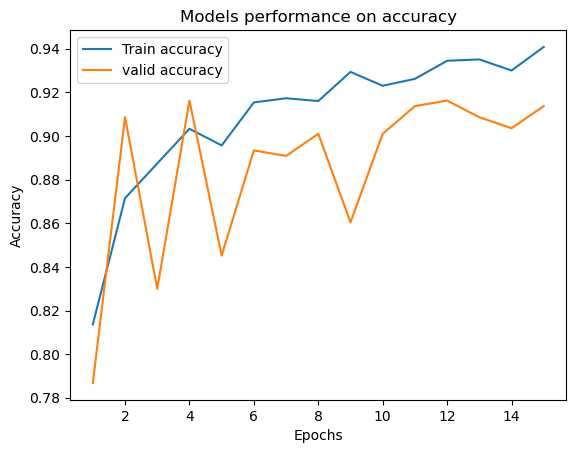

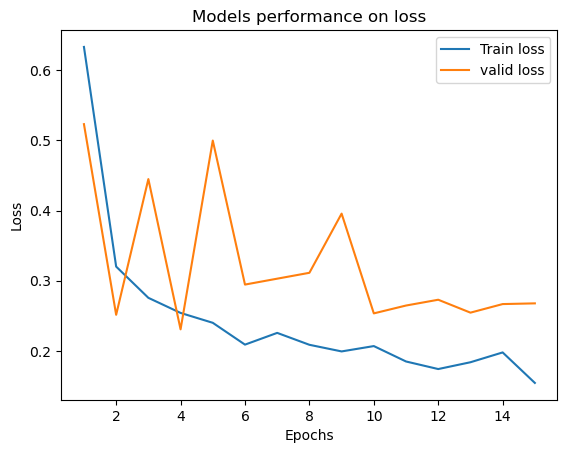

In [210]:
Epoch = len(history.epoch)+1
plot(range(1,Epoch),history.history['accuracy'])
plot(range(1,Epoch),history.history['val_accuracy'])
xlabel('Epochs')
ylabel('Accuracy')
title('Models performance on accuracy')
legend(['Train accuracy','valid accuracy'])
show()
plot(range(1,Epoch),history.history['loss'])
plot(range(1,Epoch),history.history['val_loss'])
xlabel('Epochs')
ylabel('Loss')
title('Models performance on loss')
legend(['Train loss','valid loss'])
show()